# Data Exploration

# Show the first 5 rows of the dataset.

# Check for missing values.

# Display a summary of the dataset (info() and describe()).

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
penguins = sns.load_dataset('penguins')
print(penguins.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


In [25]:
# use the DataFrame method isnull() instead of seaborn
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [26]:
penguins.info()
penguins.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


# Univariate Analysis

# Histogram for bill_length_mm.

# Countplot for species.

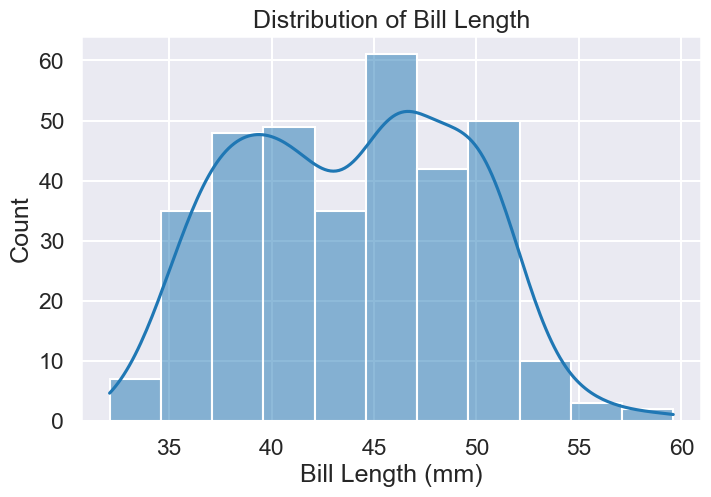

In [27]:
plt.figure(figsize=(8, 5))
sns.histplot(penguins['bill_length_mm'], kde=True)
plt.title('Distribution of Bill Length')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Count')
plt.show()


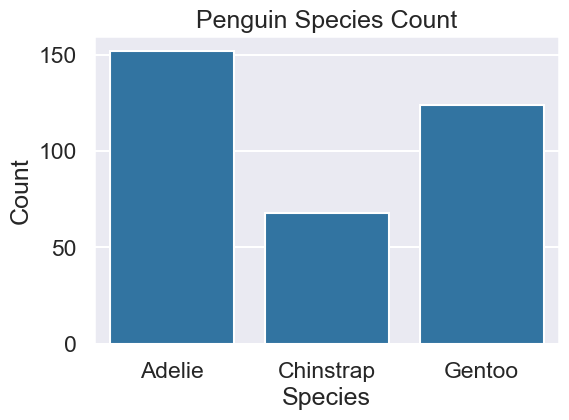

In [28]:
plt.figure(figsize=(6, 4))
sns.countplot(data=penguins, x='species')
plt.title('Penguin Species Count')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

# Bivariate / Multivariate Analysis

# Scatter plot of bill_length_mm vs bill_depth_mm, color by species

# Boxplot of flipper_length_mm by species

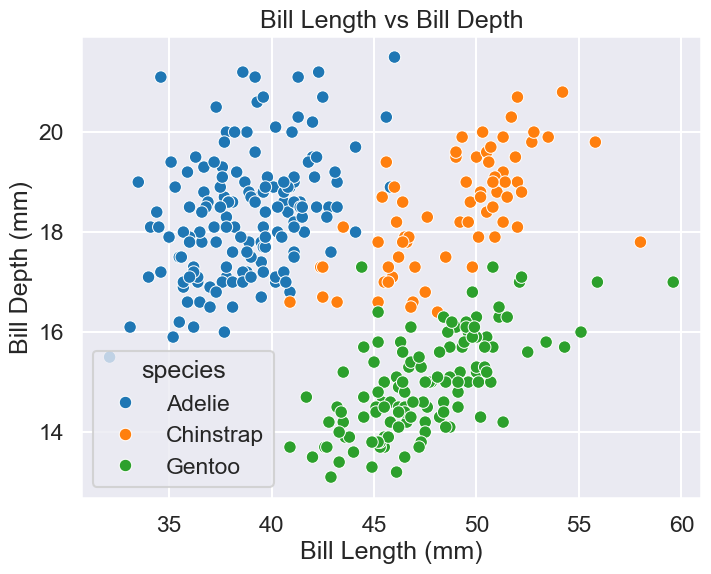

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species')
plt.title('Bill Length vs Bill Depth')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()


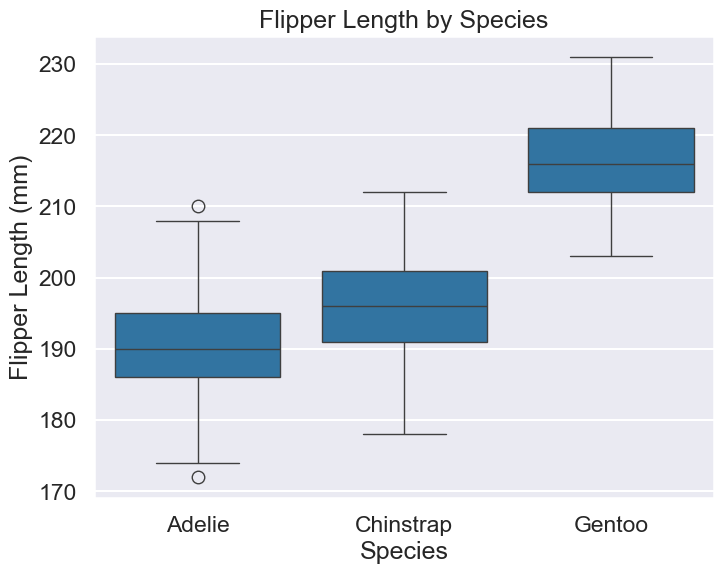

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=penguins, x='species', y='flipper_length_mm')
plt.title('Flipper Length by Species')
plt.xlabel('Species')
plt.ylabel('Flipper Length (mm)')
plt.show()


# Multivariate Analysis

# Use a pairplot to explore relationships between numeric variables, with hue='species'.

# Compute a correlation matrix for numeric columns and visualize it with a heatmap

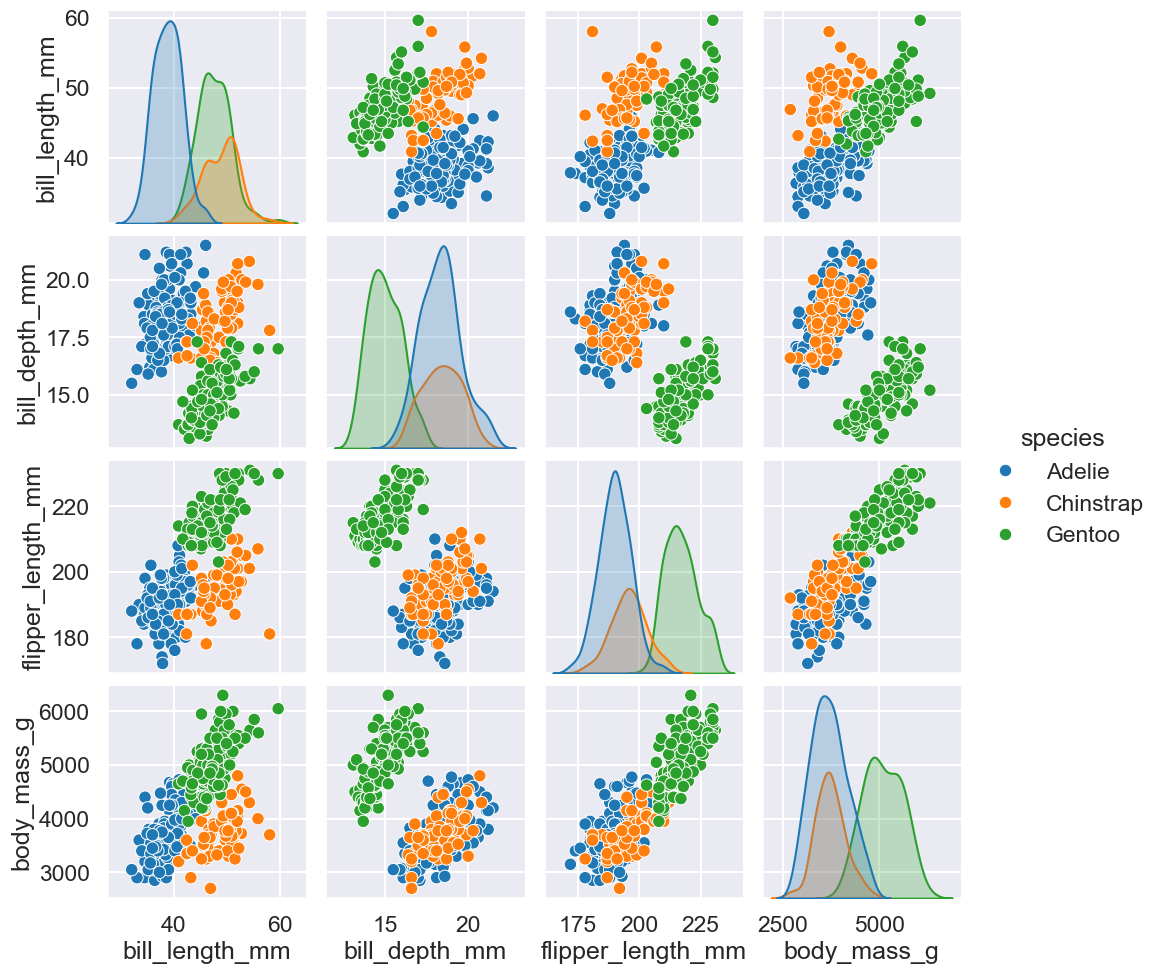

In [31]:
sns.pairplot(penguins.dropna(), hue='species')
plt.show()


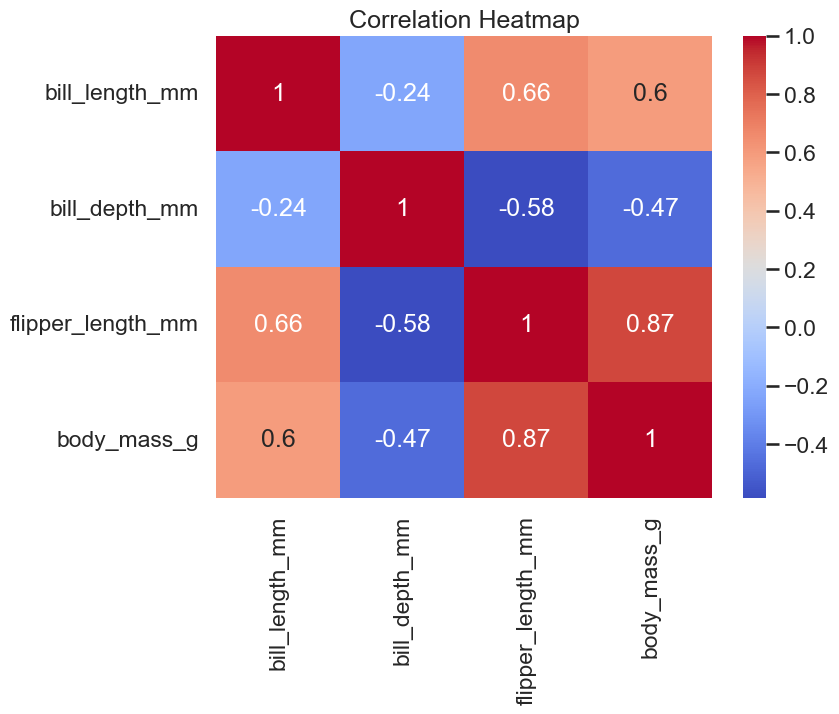

In [32]:
plt.figure(figsize=(8, 6))
corr = penguins.select_dtypes('number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
# End of code

# Categorical Analysis

# Create a barplot of average body_mass_g for each island.

# Add a hue='sex' to the barplot.

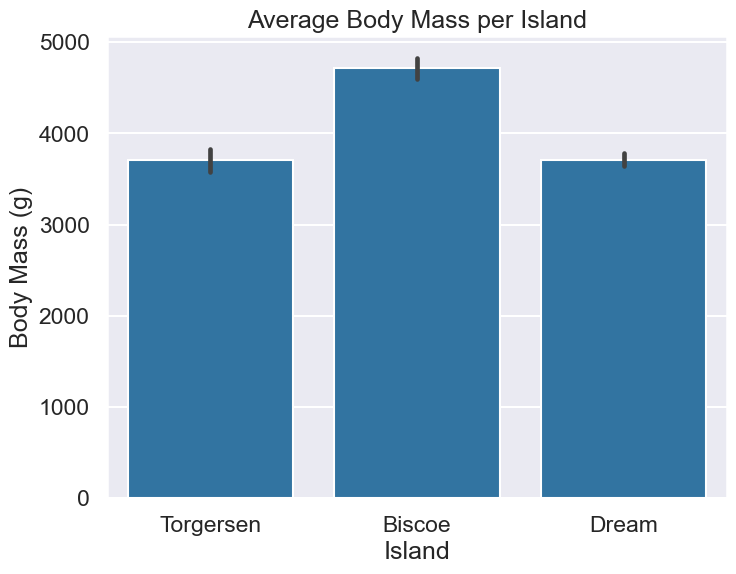

In [33]:
plt.figure(figsize=(8, 6))
sns.barplot(data=penguins, x='island', y='body_mass_g')
plt.title('Average Body Mass per Island')
plt.xlabel('Island')
plt.ylabel('Body Mass (g)')
plt.show()


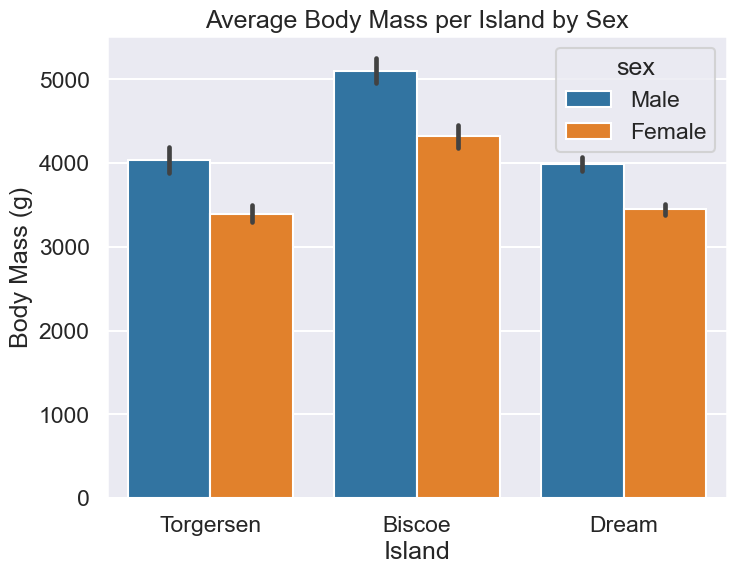

In [34]:
plt.figure(figsize=(8, 6))
sns.barplot(data=penguins, x='island', y='body_mass_g', hue='sex')
plt.title('Average Body Mass per Island by Sex')
plt.xlabel('Island')
plt.ylabel('Body Mass (g)')
plt.show()
sns.set_style('whitegrid')

# Customization Challenge

# Change the color palette of one or more plots

# Add titles, axis labels, and rotate x-axis labels if needed

# Try sns.set_style() or sns.set_context() to change the overall appearance

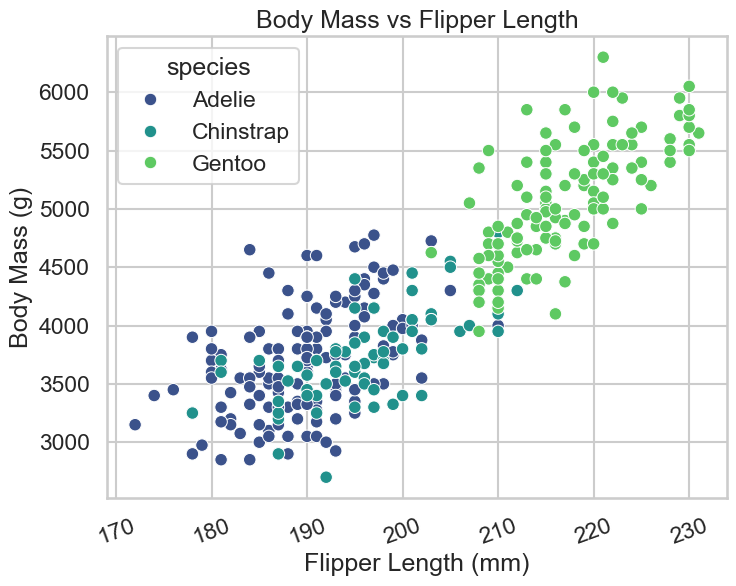

In [35]:
sns.set_style("whitegrid")
sns.set_context("talk")

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=penguins, 
    x='flipper_length_mm', 
    y='body_mass_g', 
    hue='species', 
    palette='viridis'
)
plt.title('Body Mass vs Flipper Length')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.xticks(rotation=20)
plt.show()
sns.set_style('darkgrid')

# Interpretation (what we learn)

# Here are some key takeaways you’ll notice when you explore the plots:

# 1. Species Differences

Gentoo penguins are generally bigger (body mass + flipper length).

Adelie penguins are smaller and more compact.

Chinstrap penguins have noticeably longer, narrower bills in the scatterplots.

# 2. Geographic Patterns

Penguins found on Biscoe Island tend to be heavier (because Gentoos live there).

Torgersen mostly hosts Adelie penguins → lighter + shorter flippers.

# 3. Sex Differences

Male penguins in nearly all species are heavier than females.

This is visible in the barplots where male bars are generally taller.

# 4. Correlations

Flipper length and body mass are positively correlated.

Bill depth and bill length show moderate but species-specific patterns